In [100]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
path = 'E:/SUBJECTS/497 MATH S17 PSP--/Data/'
interpath= 'E:/SUBJECTS/497 MATH S17 PSP--/Data/intermediate/'

In [125]:
baseline_missingHandle=pd.read_pickle(interpath+"baseline_missingHandled_Dan_20170406.pickle")
print baseline_missingHandle.shape
print baseline_missingHandle.columns
baseline_missingHandle.head()

(16039, 26)
Index([u'A1C', u'BMI', u'Glucose', u'BP_Diastolic', u'BP_Systolic', u'DM',
       u'ME', u'Glaucoma_Suspect', u'Open_angle_Glaucoma', u'Cataract',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]', u'worst_DR',
       u'recent_DR'],
      dtype='object')


,A1C,BMI,Glucose,BP_Diastolic,BP_Systolic,DM,ME,Glaucoma_Suspect,Open_angle_Glaucoma,Cataract,...,Race_Other,Race_White,"Age_group_(18, 48]","Age_group_(49, 55]","Age_group_(56, 60]","Age_group_(61, 66]","Age_group_(67, 74]","Age_group_(75, 114]",worst_DR,recent_DR
Person_Nbr,,,,,,,,,,,,,,,,,,,,,
33,8.000000,31.579036,130.000000,78.000000,118.000000,True,False,False,False,False,...,0,0,0,0,0,1,0,0,no_DR,no_DR
89,7.280372,32.452934,133.443515,53.000000,92.000000,True,False,True,False,False,...,1,0,0,0,1,0,0,0,no_DR,no_DR
146,6.989072,31.129173,128.568645,75.000000,130.000000,True,False,True,False,True,...,1,0,0,0,0,0,1,0,no_DR,no_DR
196,7.280372,32.452934,78.000000,88.000000,125.000000,False,False,False,False,False,...,1,0,0,0,1,0,0,0,no_DR,no_DR
327,7.203035,31.579036,121.000000,78.082412,134.756106,False,False,True,False,False,...,0,0,0,0,0,1,0,0,no_DR,no_DR


In [84]:
quantitive_columns = baseline_missingHandle.select_dtypes(include=[np.number]).columns
print len(quantitive_columns)
quantitive_columns

19


Index([u'A1C', u'BMI', u'Glucose', u'BP_Diastolic', u'BP_Systolic',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]'],
      dtype='object')

In [85]:
qualitative_columns = baseline_missingHandle.select_dtypes(include=[object]).columns
print len(qualitative_columns)
qualitative_columns

2


Index([u'worst_DR', u'recent_DR'], dtype='object')

In [87]:
print "Worst_DR:"
print (baseline_missingHandle.worst_DR).value_counts()
print "\nRecent_DR:"
print (baseline_missingHandle.recent_DR).value_counts()

Worst_DR:
no_DR    12009
mNPDR     2055
PDR       1040
MNPDR      711
SNPDR      224
Name: worst_DR, dtype: int64

Recent_DR:
no_DR    12009
mNPDR     2214
PDR        964
MNPDR      654
SNPDR      198
Name: recent_DR, dtype: int64


In [126]:
predictors = [u'A1C', u'BMI', u'Glucose', u'BP_Diastolic', u'BP_Systolic',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]'
             ]

## KNN

Predictors: Baseline features 
Response: Worst_DR

In [157]:
X=baseline_missingHandle[predictors]
y=baseline_missingHandle['worst_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
for K in [3,5,10]:
    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K ,"\n"
    print(pd.crosstab(y_test, y_pred)), "\n"
    print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
    print("\nNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
    print "--------------------------"


Test set accuracy is  64.993765586 % for K-Value: 3 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR        13   10      2      8    109
PDR          11   15      1      8    173
SNPDR         4    7      0      1     33
mNPDR        23   32      6     24    326
no_DR       116  140     26     87   2033 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.08      0.09      0.08       142
        PDR       0.07      0.07      0.07       208
      SNPDR       0.00      0.00      0.00        45
      mNPDR       0.19      0.06      0.09       411
      no_DR       0.76      0.85      0.80      2402

avg / total       0.60      0.65      0.62      3208


Number of mislabeled points out of a total 3208 points : 1123
--------------------------

Test set accuracy is  69.63840399 % for K-Value: 5 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         2    5    

In [129]:
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. %s (%f)" % (f + 1, [predictors[int(i)] for i in indices][f], importances[indices[f]]))

Feature ranking:
1. BP_Diastolic (0.122901)
2. A1C (0.121952)
3. Glucose (0.118588)
4. BMI (0.118502)
5. BP_Systolic (0.118152)
6. Race_Black or African American (0.074474)
7. Gender_F (0.072879)
8. Gender_M (0.049522)
9. Race_Other (0.037736)
10. Age_group_(75, 114] (0.023978)
11. Age_group_(61, 66] (0.023794)
12. Age_group_(18, 48] (0.022474)
13. Age_group_(49, 55] (0.021983)
14. Age_group_(67, 74] (0.021847)
15. Age_group_(56, 60] (0.021579)


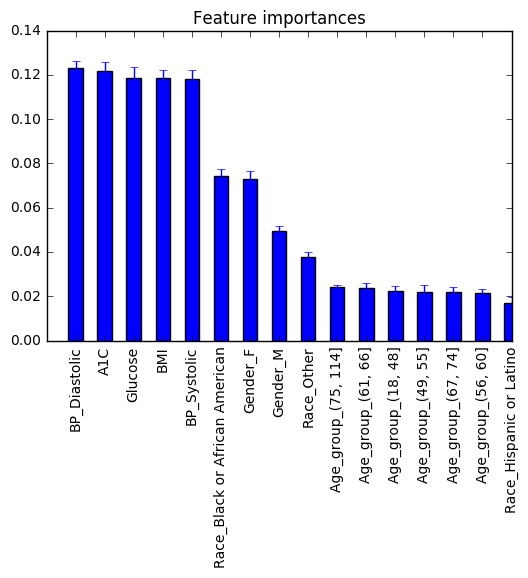

In [130]:
# Plot the feature importances of the model
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center",width=.5)

plt.xticks(range(X.shape[1]), [predictors[int(i)] for i in indices], rotation='vertical')
plt.xlim([-1,15])
plt.show()


Predictors: Baseline features Response: Recent_DR

In [158]:
X=baseline_missingHandle[predictors]
y=baseline_missingHandle['recent_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
for K in [3,5,10]:
    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K ,"\n"
    print(pd.crosstab(y_test, y_pred)), "\n"
    print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
    print("\nNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
    print "--------------------------"


Test set accuracy is  65.6172069825 % for K-Value: 3 

col_0      MNPDR  PDR  SNPDR  mNPDR  no_DR
recent_DR                                 
MNPDR          7    8      3      8    105
PDR           12   13      4     11    153
SNPDR          2    4      0      1     32
mNPDR         26   21      6     26    364
no_DR        117  117     24     85   2059 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.04      0.05      0.05       131
        PDR       0.08      0.07      0.07       193
      SNPDR       0.00      0.00      0.00        39
      mNPDR       0.20      0.06      0.09       443
      no_DR       0.76      0.86      0.81      2402

avg / total       0.60      0.66      0.62      3208


Number of mislabeled points out of a total 3208 points : 1103
--------------------------

Test set accuracy is  70.0436408978 % for K-Value: 5 

col_0      MNPDR  PDR  SNPDR  mNPDR  no_DR
recent_DR                                 
MNPDR       

In [132]:
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. %s (%f)" % (f + 1, [predictors[int(i)] for i in indices][f], importances[indices[f]]))

Feature ranking:
1. A1C (0.123816)
2. BP_Diastolic (0.122408)
3. BP_Systolic (0.121310)
4. BMI (0.118639)
5. Glucose (0.117402)
6. Race_Black or African American (0.075529)
7. Gender_F (0.071994)
8. Gender_M (0.047912)
9. Race_Other (0.036702)
10. Age_group_(61, 66] (0.025568)
11. Age_group_(75, 114] (0.024916)
12. Age_group_(18, 48] (0.022462)
13. Age_group_(67, 74] (0.022179)
14. Age_group_(49, 55] (0.021975)
15. Age_group_(56, 60] (0.020700)


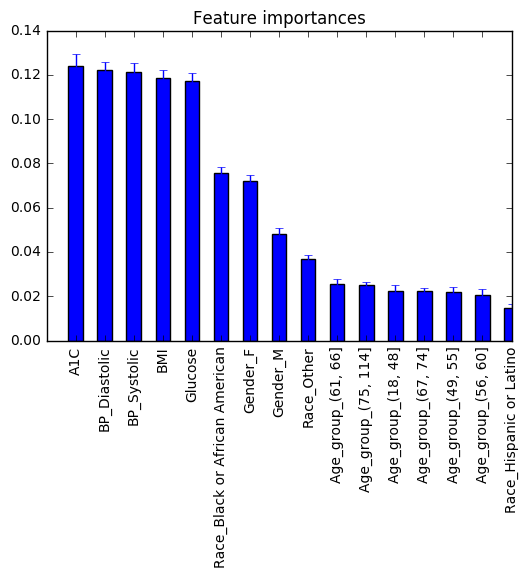

In [133]:
# Plot the feature importances of the model
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center",width=.5)

plt.xticks(range(X.shape[1]), [predictors[int(i)] for i in indices], rotation='vertical')
plt.xlim([-1,15])
plt.show()


Predictors: More features Response: Worst_DR

In [90]:
Morefeatures_missingHandle=pd.read_pickle(interpath+"Morefeatures_missingHandled_Dan_20170415.pickle")
print Morefeatures_missingHandle.shape
print Morefeatures_missingHandle.columns
Morefeatures_missingHandle.head()

(16039, 54)
Index([u'A1C', u'BMI', u'Glucose', u'BP_Systolic', u'BP_Diastolic',
       u'MR_OD_SPH_Numeric', u'MR_OD_CYL_Numeric', u'MR_OS_SPH_Numeric',
       u'MR_OS_CYL_Numeric', u'MR_OS_DVA_ability', u'MR_OD_DVA_ability',
       u'MR_OS_NVA_ability', u'MR_OD_NVA_ability', u'DM', u'ME',
       u'Glaucoma_Suspect', u'Open_angle_Glaucoma', u'Cataract', u'Gender_F',
       u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White',
       u'recent_smoking_status_current every day smoker',
       u'recent_smoking_status_current some day smoker',
       u'recent_smoking_status_former smoker',
       u'recent_smoking_status_heavy tobacco smoker',
       u'recent_smoking_status_light tobacco smoker',
       u'recent_smoking_status_never smoker', u'recent_smoking_status_smoker',
       u'recent_smoking_status_unknown if ever smoked',
       u'family_DM_G_DM_P_NDM', u'family_DM_Gp_DM', u'family_DM_Gp_SM_P

,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,MR_OD_SPH_Numeric,MR_OD_CYL_Numeric,MR_OS_SPH_Numeric,MR_OS_CYL_Numeric,MR_OS_DVA_ability,...,family_G_P_NG,family_G_Unknown,"Age_group_(18, 48]","Age_group_(49, 55]","Age_group_(56, 60]","Age_group_(61, 66]","Age_group_(67, 74]","Age_group_(75, 114]",worst_DR,recent_DR
Person_Nbr,,,,,,,,,,,,,,,,,,,,,
33,8.000000,31.579036,130.000000,118.000000,78.000000,1.250000,-0.913393,1.750000,-0.500000,20.000000,...,0,0,0,0,0,1,0,0,no_DR,no_DR
89,7.280372,32.452934,133.443515,92.000000,53.000000,0.500000,-0.750000,0.250000,-1.250000,20.000000,...,0,0,0,0,1,0,0,0,no_DR,no_DR
146,6.989072,31.129173,128.568645,130.000000,75.000000,0.802648,-0.941888,0.767671,-0.929986,22.279976,...,0,1,0,0,0,0,1,0,no_DR,no_DR
196,7.280372,32.452934,78.000000,125.000000,88.000000,1.750000,-0.750000,0.750000,-0.873557,20.000000,...,1,0,0,0,1,0,0,0,no_DR,no_DR
327,7.203035,31.579036,121.000000,134.756106,78.082412,1.250000,-0.750000,3.000000,-1.000000,25.000000,...,1,0,0,0,0,1,0,0,no_DR,no_DR


In [91]:
print "Worst_DR:"
print (Morefeatures_missingHandle.worst_DR).value_counts()
print "\nRecent_DR:"
print (Morefeatures_missingHandle.recent_DR).value_counts()

Worst_DR:
no_DR    12009
mNPDR     2055
PDR       1040
MNPDR      711
SNPDR      224
Name: worst_DR, dtype: int64

Recent_DR:
no_DR    12009
mNPDR     2214
PDR        964
MNPDR      654
SNPDR      198
Name: recent_DR, dtype: int64


In [135]:
predictors1 = [u'A1C', u'BMI', u'Glucose', u'BP_Diastolic', u'BP_Systolic',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]',u'MR_OD_SPH_Numeric', u'MR_OD_CYL_Numeric', u'MR_OS_SPH_Numeric',
       u'MR_OS_CYL_Numeric', u'MR_OS_DVA_ability', u'MR_OD_DVA_ability',
       u'MR_OS_NVA_ability', u'MR_OD_NVA_ability',u'recent_smoking_status_current every day smoker',
       u'recent_smoking_status_current some day smoker',
       u'recent_smoking_status_former smoker',
       u'recent_smoking_status_heavy tobacco smoker',
       u'recent_smoking_status_light tobacco smoker',
       u'recent_smoking_status_never smoker', u'recent_smoking_status_smoker',
       u'recent_smoking_status_unknown if ever smoked',u'family_DM_G_DM_P_NDM', u'family_DM_Gp_DM', u'family_DM_Gp_SM_P_DM',
       u'family_DM_P_DM', u'family_DM_P_NDM', u'family_DM_Unknown',
       u'family_G_GP_G_P_NG', u'family_G_Gp_G', u'family_G_Gp_G_P_G',
       u'family_G_P_G', u'family_G_P_NG', u'family_G_Unknown'
             ]

In [159]:
X=Morefeatures_missingHandle[predictors1]
y=Morefeatures_missingHandle['worst_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
for K in [3,5,10]:
    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K ,"\n"
    print(pd.crosstab(y_test, y_pred)), "\n"
    print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
    print("\nNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
    print "--------------------------"


Test set accuracy is  64.993765586 % for K-Value: 3 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         7   11      1      6    117
PDR          18   22      2      8    158
SNPDR         5    5      0      0     35
mNPDR        21   30      2     20    338
no_DR       117  132     19     98   2036 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.04      0.05      0.05       142
        PDR       0.11      0.11      0.11       208
      SNPDR       0.00      0.00      0.00        45
      mNPDR       0.15      0.05      0.07       411
      no_DR       0.76      0.85      0.80      2402

avg / total       0.60      0.65      0.62      3208


Number of mislabeled points out of a total 3208 points : 1123
--------------------------

Test set accuracy is  69.0461346633 % for K-Value: 5 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         1    7  

In [142]:
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. %s (%f)" % (f + 1, [predictors1[int(i)] for i in indices][f], importances[indices[f]]))

Feature ranking:
1. BP_Diastolic (0.050178)
2. A1C (0.048293)
3. BP_Systolic (0.047914)
4. BMI (0.047303)
5. Glucose (0.046297)
6. MR_OS_NVA_ability (0.045004)
7. MR_OD_DVA_ability (0.044573)
8. MR_OD_SPH_Numeric (0.044208)
9. MR_OS_DVA_ability (0.043683)
10. MR_OD_NVA_ability (0.043435)
11. MR_OS_CYL_Numeric (0.043036)
12. MR_OS_SPH_Numeric (0.042814)
13. MR_OD_CYL_Numeric (0.041611)
14. Race_Black or African American (0.030832)
15. Gender_F (0.029993)


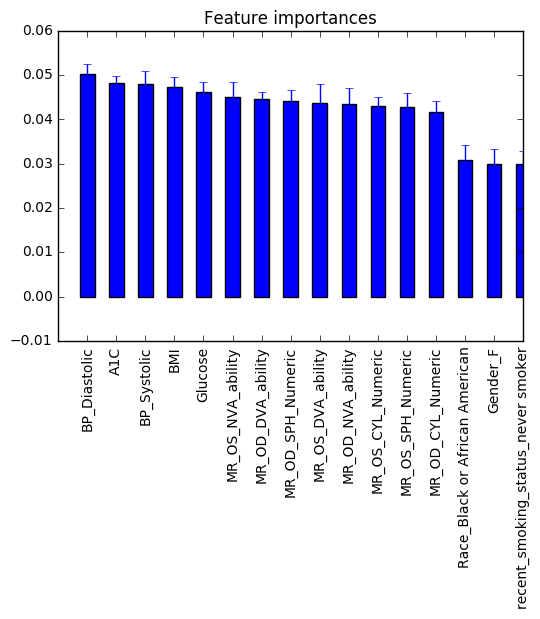

In [143]:
# Plot the feature importances of the model
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center",width=.5)

plt.xticks(range(X.shape[1]), [predictors1[int(i)] for i in indices], rotation='vertical')
plt.xlim([-1,15])
plt.show()

Predictors: Baseline features Response: Recent_DR

In [160]:
X=Morefeatures_missingHandle[predictors]
y=Morefeatures_missingHandle['recent_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
for K in [3,5,10]:
    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K ,"\n"
    print(pd.crosstab(y_test, y_pred)), "\n"
    print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
    print("\nNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
    print "--------------------------"


Test set accuracy is  65.710723192 % for K-Value: 3 

col_0      MNPDR  PDR  SNPDR  mNPDR  no_DR
recent_DR                                 
MNPDR          7    8      3      8    105
PDR           12   16      4     11    150
SNPDR          2    4      0      1     32
mNPDR         26   24      6     26    361
no_DR        117  122     23     81   2059 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.04      0.05      0.05       131
        PDR       0.09      0.08      0.09       193
      SNPDR       0.00      0.00      0.00        39
      mNPDR       0.20      0.06      0.09       443
      no_DR       0.76      0.86      0.81      2402

avg / total       0.61      0.66      0.62      3208


Number of mislabeled points out of a total 3208 points : 1100
--------------------------

Test set accuracy is  69.9812967581 % for K-Value: 5 

col_0      MNPDR  PDR  SNPDR  mNPDR  no_DR
recent_DR                                 
MNPDR        

In [145]:
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. %s (%f)" % (f + 1, [predictors1[int(i)] for i in indices][f], importances[indices[f]]))


Feature ranking:
1. BP_Diastolic (0.126303)
2. A1C (0.125148)
3. BMI (0.119971)
4. BP_Systolic (0.117941)
5. Glucose (0.116264)
6. Race_Black or African American (0.072859)
7. Gender_F (0.071966)
8. Gender_M (0.048504)
9. Race_Other (0.035754)
10. Age_group_(75, 114] (0.025399)
11. Age_group_(61, 66] (0.024364)
12. Age_group_(67, 74] (0.023663)
13. Age_group_(56, 60] (0.022414)
14. Age_group_(49, 55] (0.021908)
15. Age_group_(18, 48] (0.021093)


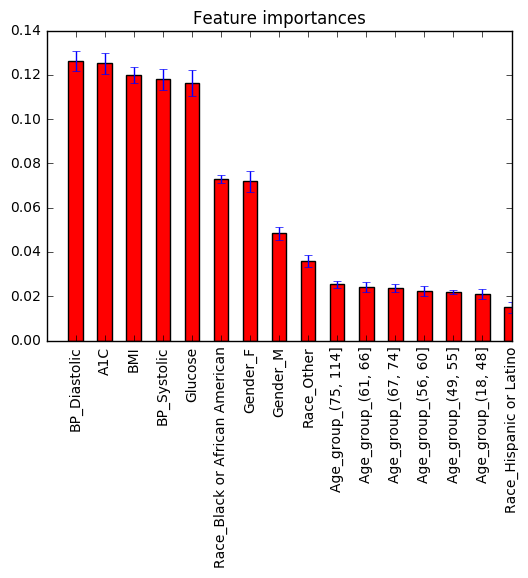

In [146]:
# Plot the feature importances of the model
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",width=.5)

plt.xticks(range(X.shape[1]), [predictors[int(i)] for i in indices], rotation='vertical')
plt.xlim([-1,15])
plt.show()

Predictors: Baseline features excluding Glucose and BP_D Response: Worst_DR

In [161]:
predictors3 = [u'A1C', u'BMI', u'BP_Systolic',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]'
             ]
X=baseline_missingHandle[predictors3]
y=baseline_missingHandle['worst_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
for K in [3,5,10]:
    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K ,"\n"
    print(pd.crosstab(y_test, y_pred)), "\n"
    print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
    print("\nNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
    print "--------------------------"


Test set accuracy is  64.5573566085 % for K-Value: 3 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         3    8      1      7    123
PDR          10   17      2      7    172
SNPDR         4    1      0      4     36
mNPDR        26   36      1     17    331
no_DR       115  129     15    109   2034 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.02      0.02      0.02       142
        PDR       0.09      0.08      0.09       208
      SNPDR       0.00      0.00      0.00        45
      mNPDR       0.12      0.04      0.06       411
      no_DR       0.75      0.85      0.80      2402

avg / total       0.59      0.65      0.61      3208


Number of mislabeled points out of a total 3208 points : 1137
--------------------------

Test set accuracy is  68.9526184539 % for K-Value: 5 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         1    7 

In [148]:
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. %s (%f)" % (f + 1, [predictors3[int(i)] for i in indices][f], importances[indices[f]]))


Feature ranking:
1. A1C (0.173509)
2. BP_Systolic (0.159444)
3. BMI (0.158843)
4. Gender_F (0.095321)
5. Race_Black or African American (0.093811)
6. Gender_M (0.065125)
7. Race_Other (0.045299)
8. Age_group_(61, 66] (0.032437)
9. Age_group_(75, 114] (0.029991)
10. Age_group_(49, 55] (0.029075)
11. Age_group_(18, 48] (0.028577)
12. Age_group_(56, 60] (0.027339)
13. Age_group_(67, 74] (0.027171)
14. Race_Hispanic or Latino (0.019506)
15. Race_White (0.009460)


Predictors: More features excluding Glucose and BP_D Response: Worst_DR

In [162]:
predictors4 = [u'A1C', u'BMI',  u'BP_Systolic',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]',u'MR_OD_SPH_Numeric', u'MR_OD_CYL_Numeric', u'MR_OS_SPH_Numeric',
       u'MR_OS_CYL_Numeric', u'MR_OS_DVA_ability', u'MR_OD_DVA_ability',
       u'MR_OS_NVA_ability', u'MR_OD_NVA_ability',u'recent_smoking_status_current every day smoker',
       u'recent_smoking_status_current some day smoker',
       u'recent_smoking_status_former smoker',
       u'recent_smoking_status_heavy tobacco smoker',
       u'recent_smoking_status_light tobacco smoker',
       u'recent_smoking_status_never smoker', u'recent_smoking_status_smoker',
       u'recent_smoking_status_unknown if ever smoked',u'family_DM_G_DM_P_NDM', u'family_DM_Gp_DM', u'family_DM_Gp_SM_P_DM',
       u'family_DM_P_DM', u'family_DM_P_NDM', u'family_DM_Unknown',
       u'family_G_GP_G_P_NG', u'family_G_Gp_G', u'family_G_Gp_G_P_G',
       u'family_G_P_G', u'family_G_P_NG', u'family_G_Unknown'
             ]
X=Morefeatures_missingHandle[predictors4]
y=Morefeatures_missingHandle['worst_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
for K in [3,5,10]:
    neigh = KNeighborsClassifier(n_neighbors = K)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K ,"\n"
    print(pd.crosstab(y_test, y_pred)), "\n"
    print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
    print("\nNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))
    print "--------------------------"


Test set accuracy is  64.3079800499 % for K-Value: 3 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         4   15      3      6    114
PDR          14   18      1     11    164
SNPDR         3    3      0      1     38
mNPDR        26   30      4     18    333
no_DR       111  142     20    106   2023 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.03      0.03      0.03       142
        PDR       0.09      0.09      0.09       208
      SNPDR       0.00      0.00      0.00        45
      mNPDR       0.13      0.04      0.07       411
      no_DR       0.76      0.84      0.80      2402

avg / total       0.59      0.64      0.61      3208


Number of mislabeled points out of a total 3208 points : 1145
--------------------------

Test set accuracy is  69.1708229426 % for K-Value: 5 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         0    8 

In [151]:
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(15):
    print("%d. %s (%f)" % (f + 1, [predictors4[int(i)] for i in indices][f], importances[indices[f]]))


Feature ranking:
1. A1C (0.054522)
2. BMI (0.051630)
3. MR_OD_DVA_ability (0.050480)
4. MR_OS_NVA_ability (0.050467)
5. MR_OS_DVA_ability (0.050053)
6. MR_OD_NVA_ability (0.049956)
7. BP_Systolic (0.049559)
8. MR_OS_SPH_Numeric (0.049490)
9. MR_OS_CYL_Numeric (0.049131)
10. MR_OD_SPH_Numeric (0.048949)
11. MR_OD_CYL_Numeric (0.047792)
12. Race_Black or African American (0.035459)
13. Gender_F (0.034611)
14. recent_smoking_status_never smoker (0.032555)
15. family_DM_P_DM (0.027028)


## Gaussian NB

Predictors: Baseline features Response: Worst_DR

In [163]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
X=baseline_missingHandle[predictors]
y=baseline_missingHandle['worst_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
model.fit(X_train, y_train)
print(model)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"\n"
print(pd.crosstab(y_test, y_pred)), "\n"
print "Classification Report:\n", (metrics.classification_report(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

GaussianNB(priors=None)

Test set accuracy is  10.0374064838 

col_0     MNPDR  PDR  SNPDR  mNPDR  no_DR
worst_DR                                 
MNPDR         0   20     35     87      0
PDR           0   36     58    114      0
SNPDR         0    3     17     25      0
mNPDR         0   42    101    268      0
no_DR         1  246    704   1450      1 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.00      0.00      0.00       142
        PDR       0.10      0.17      0.13       208
      SNPDR       0.02      0.38      0.04        45
      mNPDR       0.14      0.65      0.23       411
      no_DR       1.00      0.00      0.00      2402

avg / total       0.77      0.10      0.04      3208

Number of mislabeled points out of a total 3208 points : 2886


## Bernoulli NB

Predictors: Baseline features  Response: Worst_DR

In [164]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
X=baseline_missingHandle[predictors]
y=baseline_missingHandle['worst_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
model.fit(X_train, y_train)
print(model)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"\n"
print(pd.crosstab(y_test, y_pred)), "\n"
print "Classification Report:\n", (metrics.classification_report(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Test set accuracy is  74.8753117207 

col_0     no_DR
worst_DR       
MNPDR       142
PDR         208
SNPDR        45
mNPDR       411
no_DR      2402 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.00      0.00      0.00       142
        PDR       0.00      0.00      0.00       208
      SNPDR       0.00      0.00      0.00        45
      mNPDR       0.00      0.00      0.00       411
      no_DR       0.75      1.00      0.86      2402

avg / total       0.56      0.75      0.64      3208

Number of mislabeled points out of a total 3208 points : 806


Predictors: More features Response: Worst_DR

In [167]:
model=BernoulliNB()
X=Morefeatures_missingHandle[predictors1]
y=Morefeatures_missingHandle['worst_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
model.fit(X_train, y_train)
print(model)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"\n"
print(pd.crosstab(y_test, y_pred)), "\n"
print "Classification Report:\n", (metrics.classification_report(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Test set accuracy is  74.812967581 

col_0     SNPDR  no_DR
worst_DR              
MNPDR         0    142
PDR           0    208
SNPDR         0     45
mNPDR         0    411
no_DR         2   2400 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.00      0.00      0.00       142
        PDR       0.00      0.00      0.00       208
      SNPDR       0.00      0.00      0.00        45
      mNPDR       0.00      0.00      0.00       411
      no_DR       0.75      1.00      0.86      2402

avg / total       0.56      0.75      0.64      3208

Number of mislabeled points out of a total 3208 points : 808


## SVM

Predictors: Baseline features Response: Worst_DR

In [170]:
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC()
X=baseline_missingHandle[predictors]
y=baseline_missingHandle['recent_DR']
X=preprocessing.normalize(X)
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.20,random_state=42)
model.fit(X_train, y_train)
print(model)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print "\nTest set accuracy is ", accuracy_score(y_test,y_pred)*100,"\n"
print(pd.crosstab(y_test, y_pred)), "\n"
print "Classification Report:\n", (metrics.classification_report(y_test,y_pred))
print("\nNumber of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0],(y_test != y_pred).sum()))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Test set accuracy is  74.8753117207 

col_0      no_DR
recent_DR       
MNPDR        131
PDR          193
SNPDR         39
mNPDR        443
no_DR       2402 

Classification Report:
             precision    recall  f1-score   support

      MNPDR       0.00      0.00      0.00       131
        PDR       0.00      0.00      0.00       193
      SNPDR       0.00      0.00      0.00        39
      mNPDR       0.00      0.00      0.00       443
      no_DR       0.75      1.00      0.86      2402

avg / total       0.56      0.75      0.64      3208


Number of mislabeled points out of a total 3208 points : 806
